In [1]:
from gurobipy import *
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

# Optimization

In [2]:
# Flight time matrix
tau = [[0, 28.19], [28.20, 0]]
tau = np.array(tau) / 5
tau = np.ceil(tau)

# SOC levels drop matrix
kappa = [[0, 4], [4, 0]]

# Charging Time matrix
gamma = [3.237872699, 3.729470167, 4.404786588, 5.379957014, 6.913363091,
        9.685271742, 16.30528373, 71.41103553]
gamma = np.array(gamma) / 5
gamma = np.ceil(gamma)

In [3]:
# Constants
# T = int(1440 / 5) + 3

T = int(1440 / 5) + 7
K = 8
V = [0, 1]

# T = 4 * T # 1152

f_values = np.zeros((T, 2, 2))
data = pd.read_csv('../input/schedule.csv')
LAX_DTLA = data[data['od'] == 'LAX_DTLA']
DTLA_LAX = data[data['od'] == 'DTLA_LAX']
# Create the list of lists
LAX_DTLA = [[1 if i in LAX_DTLA['schedule'].tolist() else 0] for i in range(1440)]
DTLA_LAX = [[1 if i in DTLA_LAX['schedule'].tolist() else 0] for i in range(1440)]

# Reshape the array
new_array_LAX_DTLA = np.array(LAX_DTLA).reshape((288, 5))
new_array_DTLA_LAX = np.array(DTLA_LAX).reshape((288, 5))
# Convert back to list
new_array_LAX_DTLA = new_array_LAX_DTLA.tolist()
new_array_DTLA_LAX = new_array_DTLA_LAX.tolist()
# Add elements within each cell
new_array_LAX_DTLA_sum = np.sum(new_array_LAX_DTLA, axis=1)
new_array_DTLA_LAX_sum = np.sum(new_array_DTLA_LAX, axis=1)

LAX_DTLA = new_array_LAX_DTLA_sum # Binary flight schedule for 5-mins intervals
DTLA_LAX = new_array_DTLA_LAX_sum

In [4]:
sum(LAX_DTLA) + sum(DTLA_LAX)

769

In [5]:
1152/4

288.0

In [6]:
# LAX_DTLA1 = np.concatenate((LAX_DTLA[144:], LAX_DTLA, LAX_DTLA, LAX_DTLA, LAX_DTLA[:144]))
# DTLA_LAX1 = np.concatenate((DTLA_LAX[144:], DTLA_LAX, DTLA_LAX, DTLA_LAX, DTLA_LAX[144:]))

LAX_DTLA1 = LAX_DTLA
DTLA_LAX1 = DTLA_LAX


In [7]:
for t in range(T-7):
    f_values[t+1][0][1] = LAX_DTLA1[t] # get the first (and only) item of the inner list
    f_values[t+1][1][0] = DTLA_LAX1[t] # get the first (and only) item of the inner list
# f_values[t+2][0][1] = LAX_DTLA[0]
# f_values[t+2][1][0] = DTLA_LAX1[0]
# f_values[t+3][0][1] = LAX_DTLA[1]
# f_values[t+3][1][0] = DTLA_LAX1[1]

In [8]:
f_values[293,:,:]

array([[0., 0.],
       [0., 0.]])

In [9]:
sum(f_values[1:289, 0, 1]) + sum(f_values[1:289, 1, 0])

769.0

In [10]:
gamma

array([ 1.,  1.,  1.,  2.,  2.,  2.,  4., 15.])

In [11]:
sum(gamma)

28.0

In [12]:
variables = {f'a{str(i)}': [] for i in range(2, int(sum(gamma)) + 1)}

In [13]:
variables

{'a2': [],
 'a3': [],
 'a4': [],
 'a5': [],
 'a6': [],
 'a7': [],
 'a8': [],
 'a9': [],
 'a10': [],
 'a11': [],
 'a12': [],
 'a13': [],
 'a14': [],
 'a15': [],
 'a16': [],
 'a17': [],
 'a18': [],
 'a19': [],
 'a20': [],
 'a21': [],
 'a22': [],
 'a23': [],
 'a24': [],
 'a25': [],
 'a26': [],
 'a27': [],
 'a28': []}

In [14]:
def find_combinations(k):
    a = []
    for i in range(len(gamma)):
        for j in range(len(gamma)):
            if i != j:
                if sum(gamma[i:j+1]) == k:
                    a.append([i,j])
            if gamma[i] == k:
                a.append([i])
    a_unique = list(set(tuple(i) for i in a))
    a_unique = [item[0] if len(item) == 1 else item for item in a_unique]
    return a_unique

for i in range(2, int(sum(gamma)) + 1):
    variables['a' + str(i)] = find_combinations(i)



In [15]:
variables

{'a2': [(0, 1), (1, 2), 5, 4, 3],
 'a3': [(2, 3), (0, 2)],
 'a4': [6, (4, 5), (1, 3), (3, 4)],
 'a5': [(2, 4), (0, 3)],
 'a6': [(5, 6), (3, 5), (1, 4)],
 'a7': [(2, 5), (0, 4)],
 'a8': [(4, 6), (1, 5)],
 'a9': [(0, 5)],
 'a10': [(3, 6)],
 'a11': [(2, 6)],
 'a12': [(1, 6)],
 'a13': [(0, 6)],
 'a14': [],
 'a15': [7],
 'a16': [],
 'a17': [],
 'a18': [],
 'a19': [(6, 7)],
 'a20': [],
 'a21': [(5, 7)],
 'a22': [],
 'a23': [(4, 7)],
 'a24': [],
 'a25': [(3, 7)],
 'a26': [(2, 7)],
 'a27': [(1, 7)],
 'a28': [(0, 7)]}

In [16]:
find_combinations(2)

[(0, 1), (1, 2), 5, 4, 3]

In [17]:
gamma

array([ 1.,  1.,  1.,  2.,  2.,  2.,  4., 15.])

In [18]:
T = T-1
# Create a new model
m = Model("Vertiport_Aircraft_Routing")

# Create variables
ni = m.addVars(((t, i, k) for t in range(T+1) for i in V for k in range(K+1)), vtype=GRB.INTEGER, name="n")
uij = m.addVars(((t, i, j, k) for t in range(T+1) for i in V for j in V for k in range(K+1) if i != j), vtype=GRB.INTEGER, name="u")
cijk = m.addVars(((t, i, x, y) for t in range(T+1) for i in V for x in range(K+1) for y in range(K+1) if x < y), vtype=GRB.INTEGER, name="c")

# Define the objective
# m.setObjective(ni.sum(144, '*', '*') + uij.sum(143, '*', '*', '*') + uij.sum(144, '*', '*', '*') 
#                + cijk.sum(144, '*', '*', '*')
#                + cijk.sum(143, '*', 0, 2) + cijk.sum(143, '*', 1, 3) + cijk.sum(143, '*', 5, 6) + cijk.sum(143, '*', 4, 5) + cijk.sum(143, '*', 3, 4)
#                + cijk.sum(142, '*', 2, 4) + cijk.sum(142, '*', 0, 3)
#                + cijk.sum(141, '*', 6, 7) + cijk.sum(141, '*', 4, 6) + cijk.sum(141, '*', 1, 4) + cijk.sum(141, '*', 3, 5)
#                + cijk.sum(140, '*', 2, 5) + cijk.sum(141, '*', 0, 4)
#                + cijk.sum(139, '*', 5, 7) + cijk.sum(139, '*', 3, 6) + cijk.sum(139, '*', 1, 5)
#                + cijk.sum(138, '*', 2, 6) + cijk.sum(138, '*', 0, 5)
#                + cijk.sum(137, '*', 4, 7) + cijk.sum(137, '*', 1, 6)
#                + cijk.sum(136, '*', 0, 6)
#                + cijk.sum(135, '*', 3, 7)
#                + cijk.sum(134, '*', 2, 7)
#                + cijk.sum(133, '*', 1, 7)
#                + cijk.sum(132, '*', 0, 7)
#                + cijk.sum(130, '*', 7, 8)
#                + cijk.sum(126, '*', 6, 8)
#                + cijk.sum(124, '*', 5, 8)
#                + cijk.sum(122, '*', 4, 8)
#                + cijk.sum(120, '*', 3, 8)
#                + cijk.sum(119, '*', 2, 8)
#                + cijk.sum(118, '*', 1, 8)
#                + cijk.sum(117, '*', 0, 8)
#                + ni.sum(0, '*', '*') + uij.sum(0, '*', '*', '*') + cijk.sum(0, '*', '*', '*'), GRB.MINIMIZE)

m.setObjective(ni.sum(0, '*', '*') + uij.sum(0, '*', '*', '*') + cijk.sum(0, '*', '*', '*'), GRB.MINIMIZE)


# m.addConstr(ni.sum(0, '*', '*') + uij.sum(0, '*', '*', '*') + cijk.sum(0, '*', '*', '*') == ni.sum(1, '*', '*') + uij.sum(1, '*', '*', '*') + uij.sum(0, '*', '*', '*') + cijk.sum(1, '*', '*', '*') + cijk.sum(0, '*', '*', '*')
#             - cijk.sum(0, '*', 0, 1) - cijk.sum(0, '*', 1, 2) - cijk.sum(0, '*', 2, 3))

# m.addConstr(ni.sum(0, '*', '*') + uij.sum(0, '*', '*', '*') + cijk.sum(0, '*', '*', '*') == ni.sum(2, '*', '*') + uij.sum(2, '*', '*', '*') + uij.sum(1, '*', '*', '*') + cijk.sum(2, '*', '*', '*') 
#             + cijk.sum(1, '*', '*', '*') - cijk.sum(1, '*', 0, 1) - cijk.sum(1, '*', 1, 2) - cijk.sum(1, '*', 2, 3) 
#             + cijk.sum(0, '*', '*', '*') - cijk.sum(0, '*', 0, 2) - cijk.sum(0, '*', 1, 3) - cijk.sum(0, '*', 3, 4) - cijk.sum(0, '*', 4, 5) - cijk.sum(0, '*', 5, 6))

# Dynamic equation
for i in V:
    for k in range(K+1):
        for t in range(1, T+1):
            m.addConstr(
                ni[t, i, k] == ni[t-1, i, k] + 
                quicksum(uij[t-tau[j][i], j, i, k+kappa[j][i]] for j in V if j != i and t-1-tau[j][i] >= 0 and k+kappa[j][i] <= K) -
                quicksum(uij[t, i, j, k] for j in V if j != i) +
                quicksum(cijk[t-sum(gamma[x:k]), i, x, k] for x in range(k) if t-sum(gamma[x:k]) >= 0) -
                quicksum(cijk[t, i, k, y] for y in range(k+1, K+1))
            )

# # Constraints
# # Each time step, total number of aircraft is the same
# for t in range(1, T+1):
#     m.addConstr(ni.sum(t, '*', '*') + uij.sum(t, '*', '*', '*') + cijk.sum(t, '*', '*', '*') == 
#                 ni.sum(t-1, '*', '*') + uij.sum(t-1, '*', '*', '*') + cijk.sum(t-1, '*', '*', '*'))

# # When it starts, we only fly aircraft with full charging status
# for k in range(K):
#     m.addConstr(uij[0, 1, 0, k] == 0)
#     m.addConstr(uij[0, 0, 1, k] == 0)
# # If anything idle in the beginning, it will be full charged
# for k in range(K):
#     m.addConstr(ni[0,0,k] == 0)
#     m.addConstr(ni[0,1,k] == 0)
    
# Stationary Constraint
for k in range(K+1):
    for i in V:
        m.addConstr(ni[0, i, k] == ni[294, i, k])
        m.addConstr(uij[0, i, 1-i, k] == uij[294, i, 1-i, k])
        
for x in range(K+1):
    for y in range(K+1):
        for i in V:
            if (x < y):
                m.addConstr(cijk[0, i, x, y] == cijk[294, i, x, y])
                
# Stationary Constraint
# for k in range(K+1):
#     for i in V:
#         m.addConstr(ni[2, i, k] == ni[290, i, k])
#         m.addConstr(uij[2, i, 1-i, k] == uij[290, i, 1-i, k])
        
# for x in range(K+1):
#     for y in range(K+1):
#         for i in V:
#             if (x < y):
#                 m.addConstr(cijk[2, i, x, y] == cijk[290, i, x, y])
        

# # nothing is charging at the first timestep
# for x in range(K+1):
#     for y in range(K+1):
#         if x < y:
#             m.addConstr(cijk[0, 1, x, y] == 0)
#             m.addConstr(cijk[0, 0, x, y] == 0)

# m.addConstr(ni.sum(0, '*', '*') + uij.sum(0, '*', '*', '*') + cijk.sum(0, '*', '*', '*') == 
#            ni.sum(T, '*', '*') + uij.sum(T, '*', '*', '*') + cijk.sum(T, '*', '*', '*'))

# # Too strict for the stationarity
# for k in range(K+1):
#    m.addConstr(ni[0, 1, k] == ni[T, 1, k])
#    m.addConstr(ni[0, 0, k] == ni[T, 0, k])


# # Upper Bound for uij
# for t in range(1, T+1):
#     for i in V:
#         for k in range(K+1):
#             m.addConstr(uij[t, i, 1 - i, k] <= ni[t, i, k] + quicksum(uij[t-tau[j][i], j, i, k+kappa[j][i]] for j in V if j != i and t-1-tau[j][i] >= 0 and k+kappa[j][i] <= K)
#                         + quicksum(cijk[t-sum(gamma[x:k]), i, x, k] for x in range(k) if t-sum(gamma[x:k]) >= 0)) 

# # Upper Bound for cijk
# for t in range(1, T+1):
#     for i in V:
#         for k in range(K+1):
#             m.addConstr(quicksum(cijk[t, i, k, y] for y in range(k+1, K+1)) <= ni[t, i, k] + quicksum(uij[t-tau[j][i], j, i, k+kappa[j][i]] for j in V if j != i and t-1-tau[j][i] >= 0 and k+kappa[j][i] <= K)
#                         + quicksum(cijk[t-sum(gamma[x:k]), i, x, k] for x in range(k) if t-sum(gamma[x:k]) >= 0) - uij[t, i, 1 - i, k]) 

# The flight schedule must be satisfied.
for j in V:
    for i in V:
        if i != j:
            for t in range(T):
                m.addConstr(uij.sum(t, i, j, '*') >= f_values[t][i][j])

# Can't fly when SOC = 0
for i in V:
    for j in V:
        for t in range(T+1):
            if i != j:
                m.addConstr(uij[t, i, j, 0] <= 3)


# Integrate new variables
m.update()

m.Params.MIPGap = 0.05  # Set the optimality tolerance to 5%
m.Params.FeasibilityTol = 1e-7

# Solve model
m.optimize()
# Redirect stdout to a file
# sys.stdout = open('output.txt', 'w')

# if m.status == GRB.Status.INFEASIBLE:
#     print('The model is infeasible; computing IIS')
#     m.computeIIS()
#     m.write("model.ilp")
#     m.feasRelaxS(0, False, False, True) # calculate relaxed solution
#     m.optimize()

# Print results
for v in m.getVars():
    if v.x > 0:  # Print only non-zero variables for clarity
        print('{} = {}'.format(v.varName, v.x))

print('Total Fleet Size:', m.objVal)

# Close the output file
# sys.stdout.close()


# Open a file for writing
with open('../output/variable_values_72miles.txt', 'w') as file:
    # Redirect standard output to the file
    old_stdout = sys.stdout
    sys.stdout = file
    print("results")
    # Check variable values and write them to the file
    for v in m.getVars():
        if v.x > 0:  # Print only non-zero variables for clarity
            print('{} = {}'.format(v.varName, v.x))

    # Restore standard output
    sys.stdout = old_stdout




Set parameter Username
Academic license - for non-commercial use only - expires 2024-04-29
Set parameter MIPGap to value 0.05
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[rosetta2])

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 6578 rows, 31860 columns and 66598 nonzeros
Model fingerprint: 0x2c3337b8
Variable types: 0 continuous, 31860 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 3e+00]
Presolve removed 853 rows and 1146 columns
Presolve time: 0.05s
Presolved: 5725 rows, 30714 columns, 63935 nonzeros
Variable types: 0 continuous, 30714 integer (0 binary)

Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
   18854    1.2003997e+01   1.224916e+05   0.000000e+00      5s
   32364    3.3153805e+01 

# Testing

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
import seaborn as sns

In [30]:
import ParseLP
importlib.reload(ParseLP)
from ParseLP import convert2df, calculate_num_aircrafts

In [21]:
output_file = 'variable_values_72miles'
specificn, specificu, specificc = convert2df(output_file)

In [22]:
# Obtain Airport Specific Aircraft States
specificu01 = specificu[specificu['i'] == 0].reset_index(drop=True)
specificu10 = specificu[specificu['i'] == 1].reset_index(drop=True)

specificc01 = specificc[specificc['i'] == 0].reset_index(drop=True)
specificc10 = specificc[specificc['i'] == 1].reset_index(drop=True)

specificn01 = specificn[specificn['i'] == 0].reset_index(drop=True)
specificn10 = specificn[specificn['i'] == 1].reset_index(drop=True)

In [23]:
# Load Charging Time Array
gamma = [3.237872699, 3.729470167, 4.404786588, 5.379957014, 6.913363091,
        9.685271742, 16.30528373, 71.41103553]
gamma = np.array(gamma) / 5
gamma = np.ceil(gamma)

In [31]:
lax_all_c, lax_all_n, lax_all_u = calculate_num_aircrafts(specificc01, specificu01, specificn01, gamma=gamma, flight_time=6)
dtla_all_c, dtla_all_n, dtla_all_u = calculate_num_aircrafts(specificc10, specificu10, specificn10, gamma=gamma, flight_time=6)
all_c, all_n, all_u = calculate_num_aircrafts(specificc, specificu, specificn, gamma=gamma, flight_time=6)

In [32]:
specificn['t'].max() + 1

295

# State Visulization

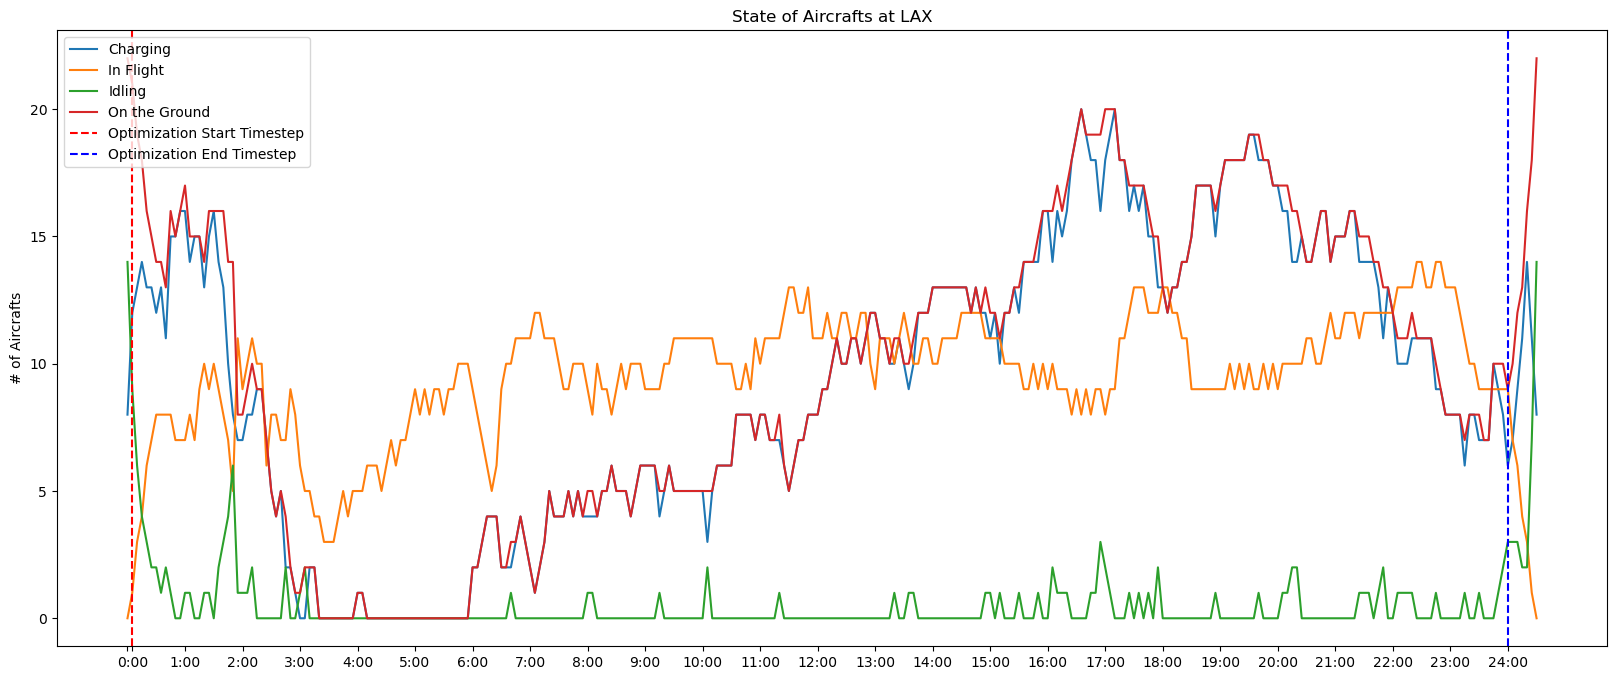

In [33]:
x0 = 0
x1 = 295

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(lax_all_c.sum(axis=0)[x0:x1], label='Charging', ax=ax)
sns.lineplot(lax_all_u.sum(axis=0)[x0:x1], label='In Flight', ax=ax)
sns.lineplot(lax_all_n.sum(axis=0)[x0:x1], label='Idling', ax=ax)
sns.lineplot((lax_all_c.sum(axis=0)[x0:x1] + lax_all_n.sum(axis=0)[x0:x1]), label='On the Ground', ax=ax)
ax.axvline(x=1, color='red', linestyle='--', label='Optimization Start Timestep')
ax.axvline(x=288, color='blue', linestyle='--', label='Optimization End Timestep')
ax.set(title='State of Aircrafts at LAX',
       ylabel='# of Aircrafts',
       xticks=np.concatenate([np.array([0,1]), np.arange(12,300, 12)]),
       xticklabels=['']+[str(i)+':00' for i in range(0,25)])
plt.legend(loc='upper left');

In [34]:
print('At t = 0, c =', lax_all_c.sum(axis=0)[x0:x1][0], '; u=', lax_all_u.sum(axis=0)[x0:x1][0], '; n=', lax_all_n.sum(axis=0)[x0:x1][0])
print('At t = 290, c =', lax_all_c.sum(axis=0)[x0:x1][294], '; u=', lax_all_u.sum(axis=0)[x0:x1][294], '; n=', lax_all_n.sum(axis=0)[x0:x1][294])

At t = 0, c = 8.0 ; u= 0.0 ; n= 14.0
At t = 290, c = 8.0 ; u= 0.0 ; n= 14.0


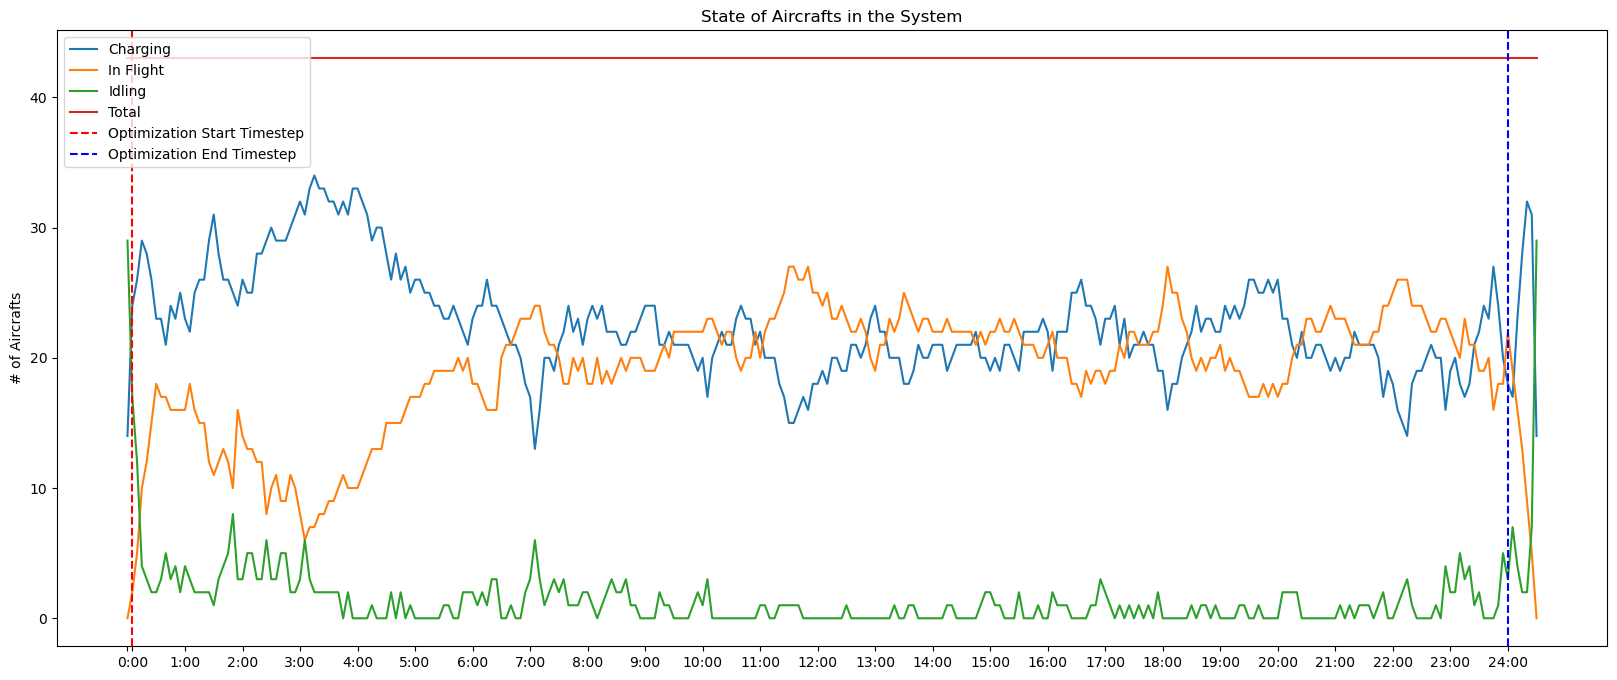

In [35]:
x0=0
x1=295

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(all_c.sum(axis=0)[x0:x1], label='Charging', ax=ax)
sns.lineplot(all_u.sum(axis=0)[x0:x1], label='In Flight', ax=ax)
sns.lineplot(all_n.sum(axis=0)[x0:x1], label='Idling', ax=ax)
sns.lineplot((all_c.sum(axis=0)[x0:x1] + all_u.sum(axis=0)[x0:x1] + all_n.sum(axis=0)[x0:x1]), label='Total', ax=ax)
ax.axvline(x=1, color='red', linestyle='--', label='Optimization Start Timestep')
ax.axvline(x=288, color='blue', linestyle='--', label='Optimization End Timestep')
ax.set(title='State of Aircrafts in the System',
       ylabel='# of Aircrafts',
       xticks=np.concatenate([np.array([0,1]), np.arange(12,300, 12)]),
       xticklabels=['']+[str(i)+':00' for i in range(0,25)])
plt.legend(loc='upper left');

In [36]:
print('At t = 0, c =', all_c.sum(axis=0)[x0:x1][0], '; u=', all_u.sum(axis=0)[x0:x1][0], '; n=', all_n.sum(axis=0)[x0:x1][0])
print('At t = 290, c =', all_c.sum(axis=0)[x0:x1][294], '; u=', all_u.sum(axis=0)[x0:x1][294], '; n=', all_n.sum(axis=0)[x0:x1][294])

At t = 0, c = 14.0 ; u= 0.0 ; n= 29.0
At t = 290, c = 14.0 ; u= 0.0 ; n= 29.0
